# New measures and other modifications (dt ... )
### Adapt the code :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle # package use to save data

from scipy import interpolate

from PIL import Image
from io import BytesIO

exec(open("param_loop.py").read(), globals())

variability = "Variability_10"
collapse = "Collapse_proba" #"Collapse_proba_per_time_unit"
applicant = "NW" #  "N" W" "NW"
variability = "Variability_always" #"Variability_until", "Variability_10", "Variability_only", "Variability_tr10", "Variability_tr0"


In [2]:
def show_sensibility(show = True): # faire un test pour ne pas afficher ... #########################################
    
    nom = DOSSIER+"n0="+str(n0)+"_w0="+str(w0)+"_final_time="+str(finalTime)+"_a="+str(a)+"_m="+str(m)+"_strength="+str(strength)+"_alpha="+str(alpha)+"_beta="+str(beta)
    pickle_in = open(nom+".txt","rb")
    Compute_variability = pickle.load(pickle_in)
    Collapse = Compute_variability[collapse]
    #            fig = plt.figure(figsize=(12, 8))
    
    if(show):
        fig = plt.figure(figsize=(20, 15))
        #plt.subplot(2,2,k+1)

        for j in range(numbreDePoint):
            if(variability != "Time_rotation_N" and variability != "Time_rotation_W"):
                Compute_variability[variability+"_"+applicant][j,:]
                plt.semilogx(Freq, Compute_variability[variability+"_"+applicant][j,:], "*", color = "blue")
            else:
                plt.semilogx(Freq, Compute_variability[variability+"_"+applicant][j,:], "*", color = "blue")

    # average
    #print(Compute_variability.keys())
    measures_average = np.nanmean(Compute_variability[variability+"_"+applicant], axis = 0)
    
    if(show):
        plt.plot(Freq, measures_average, "+", color = "blue")

    # spline
    s = interpolate.InterpolatedUnivariateSpline(Freq, measures_average)
    X_more_acc = np.exp(np.linspace(np.log(Freq[0]), np.log(Freq[-1]), 100*len(Freq))) # X array more accurate to have a smooth approximation
    Y_more_acc = s(X_more_acc)
    
    if(show):
        plt.plot(X_more_acc, Y_more_acc, "b")

    # armin & min
    indice_max_variability = np.argmax(Y_more_acc)
    argmax_variability = X_more_acc[indice_max_variability]
    max_variability = Y_more_acc[indice_max_variability]

    if(show):
        plt.plot([argmax_variability], [max_variability], "o", color ="b", markersize=20, label = "critical frequency = "+str(argmax_variability)+"\nValue = "+str(max_variability))

        plt.xlabel("Frequency", fontsize=25)
        plt.ylabel(variability, fontsize=25)
        plt.legend(loc = 2, fontsize=20)
        plt.tick_params(labelcolor = 'tab:blue')


        # Same for collapse
        plt.twinx()
        for j in range(numbreDePoint):
            if(variability != "Time_rotation_N" and variability != "Time_rotation_W"):
                plt.semilogx(Freq, Collapse[j,:], "*", color = "red")
            else:
                plt.semilogx(Freq, Collapse[j,:], "*", color = "red")

    # average
    collapse_average = np.nanmean(Collapse, axis = 0)
    if(show):
        plt.plot(Freq, collapse_average, "+", color = "r")

    # spline
    s = interpolate.InterpolatedUnivariateSpline(Freq, collapse_average)
    X_more_acc = np.exp(np.linspace(np.log(Freq[0]), np.log(Freq[-1]), 100*len(Freq))) # X array more accurate to have a smooth approximation
    Y_more_acc = s(X_more_acc)
    
    if(show):
        plt.plot(X_more_acc, Y_more_acc, "red")

    # armin & min
    indice_max_collapse = np.argmax(Y_more_acc)
    argmax_collapse = X_more_acc[indice_max_collapse]
    max_collapse = Y_more_acc[indice_max_collapse]
   # print("max_collapse", max_collapse)
  #  print("np.mean(Y_more_acc)", np.mean(Y_more_acc))

    if(max_collapse <= 2*np.mean(Y_more_acc)): # the maximum is not relevant
 #       print("condition check")
#        max_collapse = None
        argmax_collapse = None

    if(show):
        plt.plot([argmax_collapse], [max_collapse], "o", color ="r", markersize=20, label = "critical frequency = "+str(argmax_collapse)+"\nValue = "+str(max_collapse))

        plt.legend(loc = 1, fontsize=20)

        plt.tick_params(labelcolor = 'tab:red')
        plt.xlabel("Frequency", fontsize=25)
        plt.ylabel("collapse probability", fontsize=25)

      #  plt.title(variability+" over collapse for different frequency", fontsize=40)
    if(show):
        plt.title("n0="+str(n0)+"_w0="+str(w0)+"_final_time="+str(finalTime)+"_a="+str(a)+"_m="+str(m)+"_strength="+str(strength)+"_alpha="+str(alpha)+"_beta="+str(beta))
        plt.show()
    #image_file = BytesIO()
    #fig.savefig(fname = image_file)
   # image_file.seek(0)
  #  image_data = image_file.read()
 #   self.image.value = image_data
#    plt.close()           
    return argmax_variability, max_variability, argmax_collapse, max_collapse

In [3]:
def plot_critical_vs_param(param, Argmax_m, Max_m, Argmax_cp, Max_cp):
    plt.figure(figsize = (15, 8))
    #plt.subplot(1,2,1)
    
    if(param != "strength"):
        plt.semilogy(ValueOfParam, Argmax_m, "+-", color = "blue", label = "critical frequency of "+variability)
    else:
        plt.loglog(ValueOfParam, Argmax_m, "+-", color = "blue", label = "critical frequency of "+variability)
  #  plt.semilogy(ValueOfParam, Max_m, "--b", label = "critical value of "+variability)
 #   plt.tick_params(labelcolor = 'tab:blue')
  #  plt.ylabel("critical frequency of variability", fontsize = 15) 
#    plt.xlabel(param, fontsize = 15)
    
#    plt.twinx()
    
    if(param != "strength"):
        plt.semilogy(ValueOfParam, Argmax_cp, "+-", color = "red", label = "critical frequency of cp")
    else:
        plt.loglog(ValueOfParam, Argmax_cp, "+-", color = "red", label = "critical frequency of cp")
  #  plt.semilogy(ValueOfParam, Max_cp, "--r", label = "critical value of cp")
    #plt.tick_params(labelcolor = 'tab:red')
 #   plt.ylabel("critical frequency of cp", fontsize = 15) 
    plt.ylabel("critical frequency", fontsize = 20) 
    plt.xlabel(param, fontsize = 20)
    plt.legend(fontsize = 20)
    plt.title("Sensibility of parameter", fontsize = 30)
    
    plt.show()
    plt.figure(figsize = (15, 8))
#    plt.subplot(1,2,2)


#    plt.semilogy(ValueOfParam, Argmax_m, "+-", color = "blue", label = "critical frequency of "+variability)
    plt.tick_params(labelcolor = 'tab:blue')
    if(param != "strength"):
        plt.plot(ValueOfParam, Max_m, "+-b", label = "critical value of "+variability)
    else:
        plt.semilogx(ValueOfParam, Max_m, "+-b", label = "critical value of "+variability)
    plt.ylabel("critical value of variability", fontsize = 20) 
    plt.xlabel(param, fontsize = 15)
    
    plt.twinx()
    
    
  #  plt.semilogy(ValueOfParam, Argmax_cp, "+-", color = "red", label = "critical frequency of cp")
    if(param != "strength"):
        plt.plot(ValueOfParam, Max_cp, "+-r", label = "critical value of cp")
    else:
        plt.semilogx(ValueOfParam, Max_cp, "+-r", label = "critical value of cp")
    plt.tick_params(labelcolor = 'tab:red')
    plt.ylabel("critical value of cp", fontsize = 20) 
 #   plt.ylabel("critical frequency", fontsize = 20) 
    plt.xlabel(param, fontsize = 20)
    #plt.legend(fontsize = 20)
    plt.title("Sensibility of parameter", fontsize = 30)

    plt.show()
    return

## Study for n0

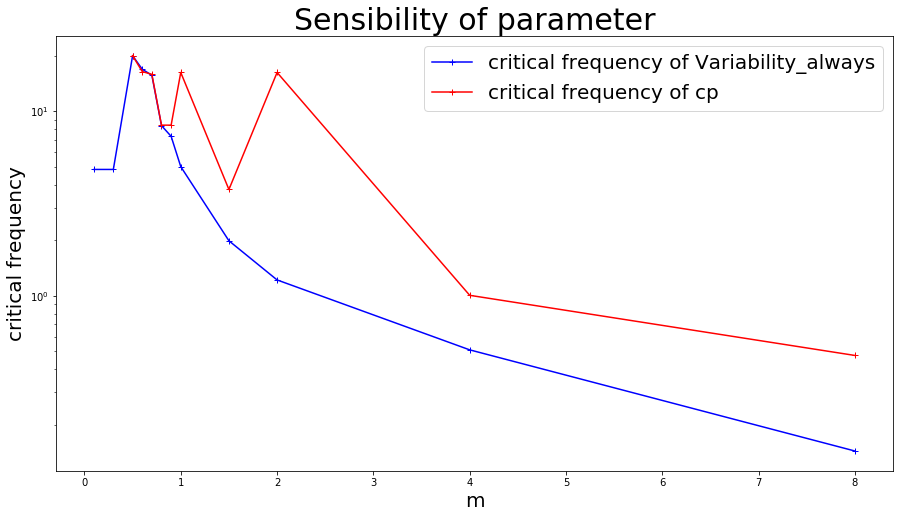

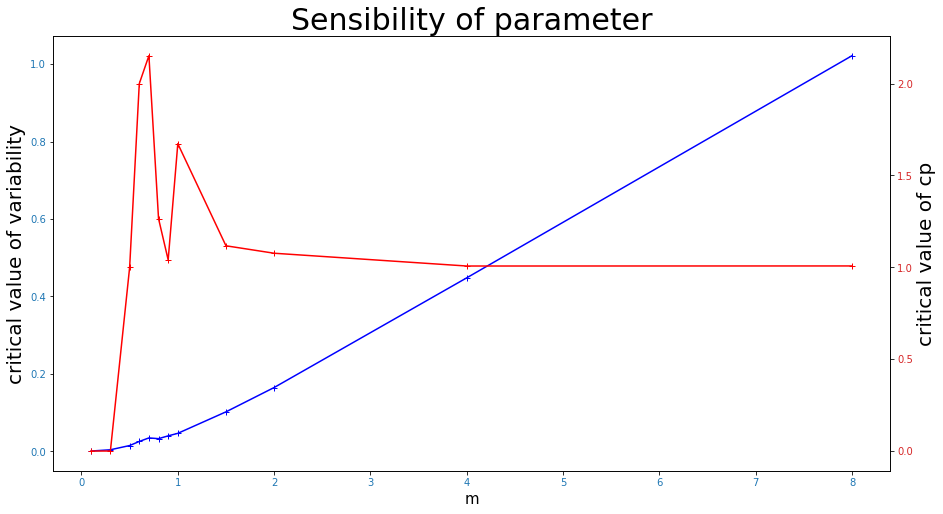

In [4]:
exec(open("param_loop.py").read(), globals())

ValueOfParam = M
Argmax_m = np.zeros(len(ValueOfParam))
Max_m = np.zeros_like(Argmax_m)
Argmax_cp = np.zeros_like(Argmax_m)
Max_cp = np.zeros_like(Argmax_m)

for i, m in enumerate(ValueOfParam):
    n0 = n0_default
    w0 = w0_default
    a = a_default
    strength = strength_default
    alpha = alpha_default
    beta = beta_default
    finalTime = finalTime_default
    Argmax_m[i], Max_m[i], Argmax_cp[i], Max_cp[i] = show_sensibility(show = False) # show = False
    

plot_critical_vs_param("m", Argmax_m, Max_m, Argmax_cp, Max_cp)

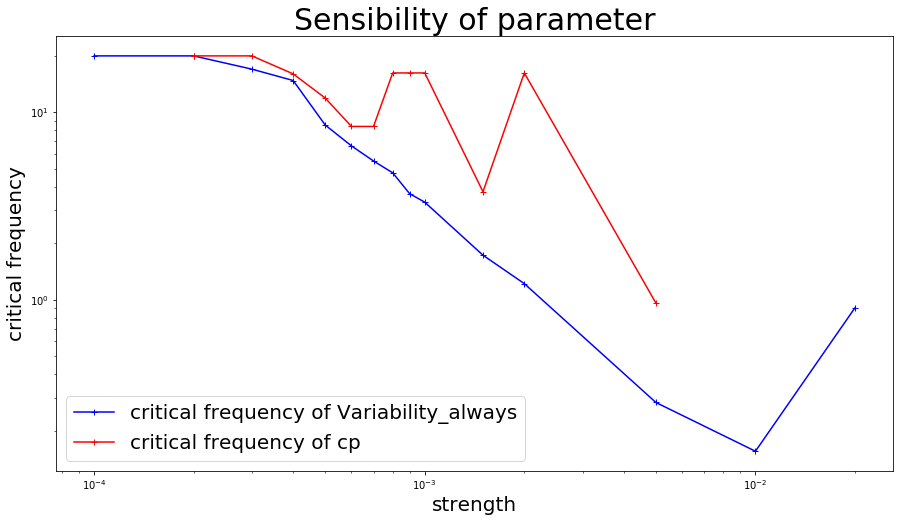

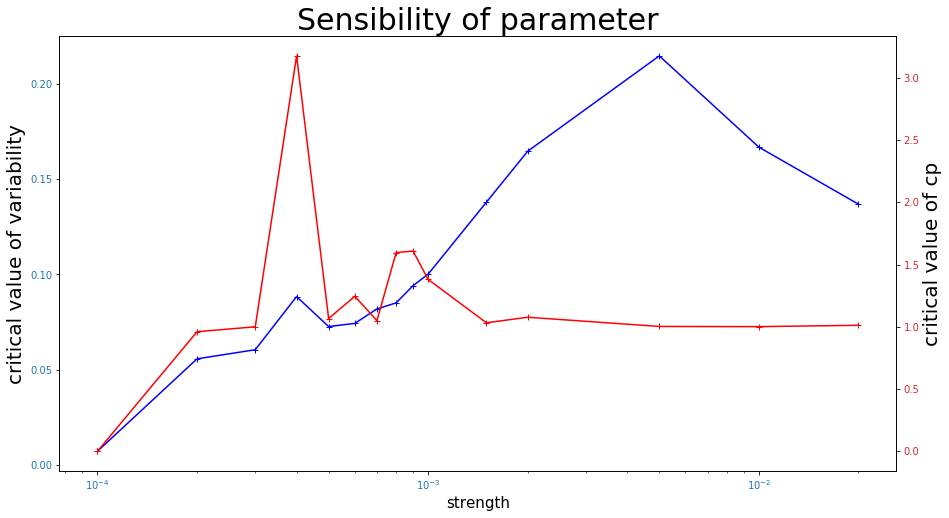

In [5]:
exec(open("param_loop.py").read(), globals())

ValueOfParam = Strength[1:]
Argmax_m = np.zeros(len(ValueOfParam))
Max_m = np.zeros_like(Argmax_m)
Argmax_cp = np.zeros_like(Argmax_m)
Max_cp = np.zeros_like(Argmax_m)

for i, strength in enumerate(ValueOfParam):
    n0 = n0_default
    w0 = w0_default
    a = a_default
    m = m_default
    alpha = alpha_default
    beta = beta_default
    finalTime = finalTime_default
    Argmax_m[i], Max_m[i], Argmax_cp[i], Max_cp[i] = show_sensibility(show = False) # show = False
    

#Argmax_m[i], Max_m[i], Argmax_cp[i], Max_cp[i]
plot_critical_vs_param("strength", Argmax_m, Max_m, Argmax_cp, Max_cp)

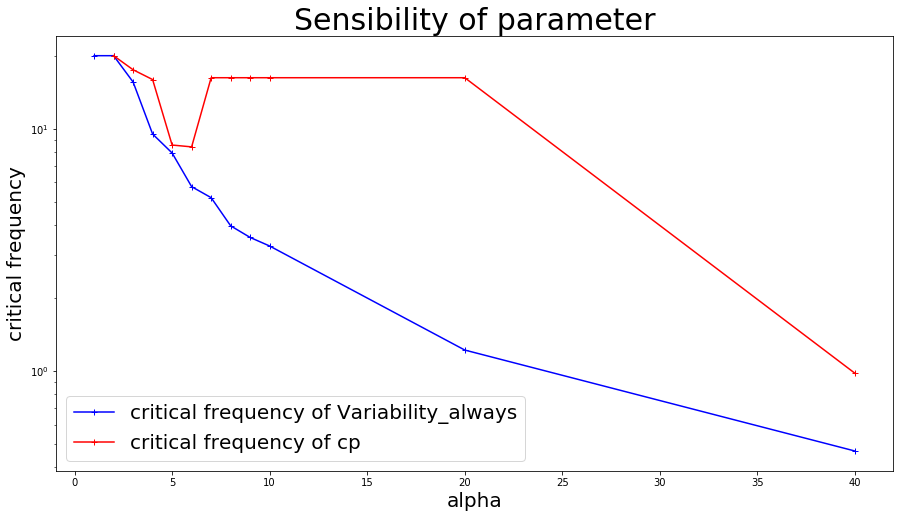

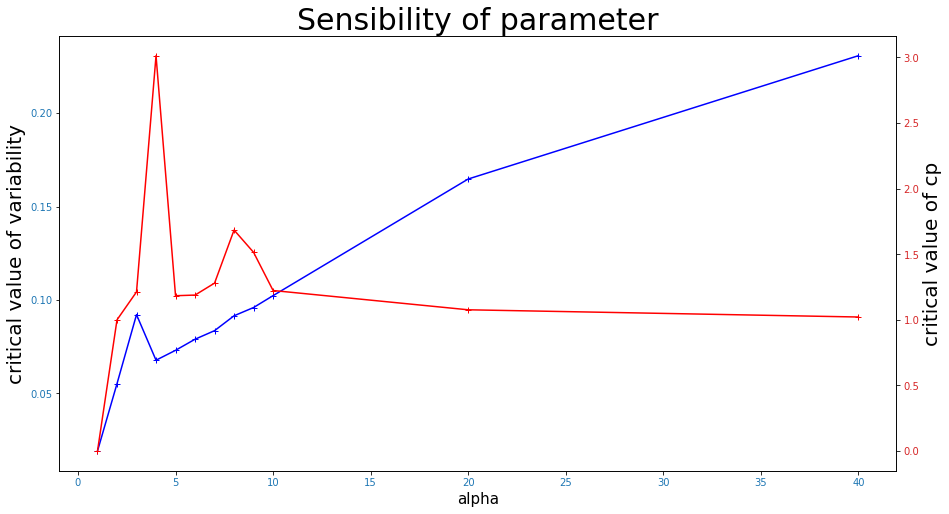

In [6]:
exec(open("param_loop.py").read(), globals())

ValueOfParam = Alpha
Argmax_m = np.zeros(len(ValueOfParam))
Max_m = np.zeros_like(Argmax_m)
Argmax_cp = np.zeros_like(Argmax_m)
Max_cp = np.zeros_like(Argmax_m)

for i, alpha in enumerate(ValueOfParam):
    n0 = n0_default
    w0 = w0_default
    a = a_default
    m = m_default
    strength = strength_default
    beta = beta_default
    finalTime = finalTime_default
    Argmax_m[i], Max_m[i], Argmax_cp[i], Max_cp[i] = show_sensibility(show = False) # show = False
    
plot_critical_vs_param("alpha", Argmax_m, Max_m, Argmax_cp, Max_cp)

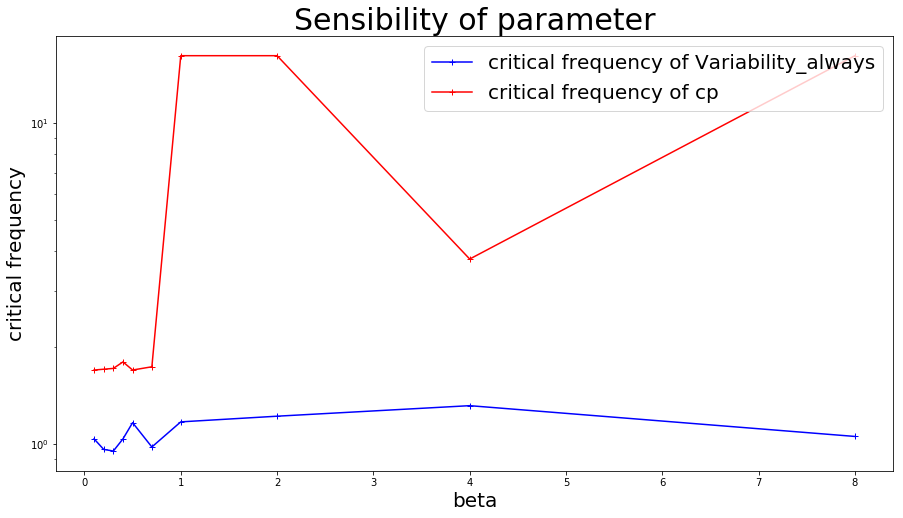

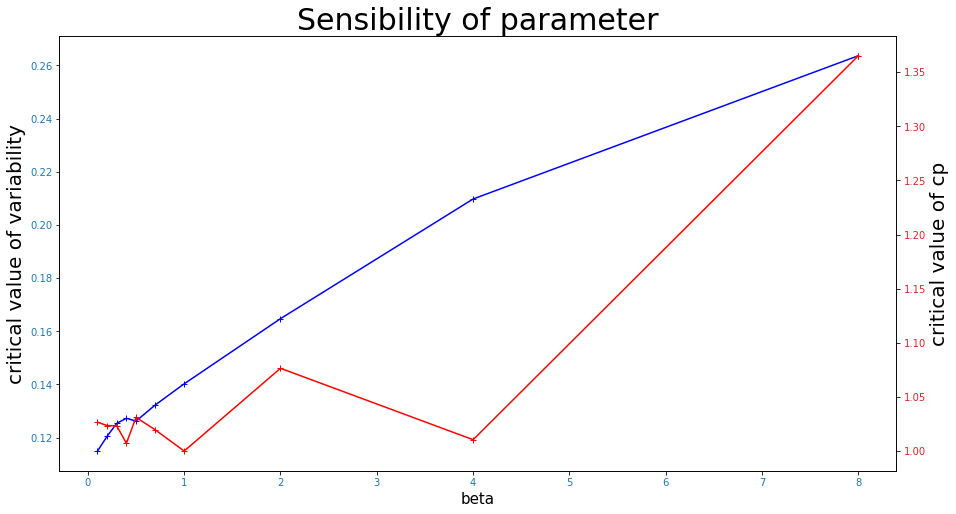

In [7]:
exec(open("param_loop.py").read(), globals())

ValueOfParam = Beta
Argmax_m = np.zeros(len(ValueOfParam))
Max_m = np.zeros_like(Argmax_m)
Argmax_cp = np.zeros_like(Argmax_m)
Max_cp = np.zeros_like(Argmax_m)

for i, beta in enumerate(ValueOfParam):
    n0 = n0_default
    w0 = w0_default
    a = a_default
    m = m_default
    strength = strength_default
    alpha = alpha_default
    finalTime = finalTime_default
    Argmax_m[i], Max_m[i], Argmax_cp[i], Max_cp[i] = show_sensibility(show = False) # show = False
    
plot_critical_vs_param("beta", Argmax_m, Max_m, Argmax_cp, Max_cp)

On the figure above, when the final time is less than 10, the decresing could be explained by the initial transition (the variability compute is computed between 10% and 20% of the time study, here, it is not enough, we are still in the the initial time.